<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/CMonroe_exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choose 1 of the following two options as your take-home exercise to complete.  You should submit your solution to this exercise as a PDF and Jupyter notebook with your name in the filename (e.g. RJohnson_exam1.pdf, RJohnson_exam1.ipynb) no later than 11:59pm on Sunday, March 3.  


There is no single "correct" method to go about the following analyses.  Your task is to try several methods, and compare the results.  For all of the choices you make (sampling, scaling, model type and parameters), you should provide justification for those choices, evidence that you have explored other choices, and why those other choices were not preferable.

For both problems, you should take care in presenting your results.  **All results and discussion should be written in markdown format at the end of your code.**  Be clear in your discussion if you are referencing a plot or figure above.  Any data or quantitative comparisons should have the data presented along with the discussion.  

_Something to note is that there are irregularities in both of these datasets.  While you always have the option to ignore such irregularities in the real world (like the missing horsepowers in the auto_mpg data), for the purposes of this exam, you will earn more points by discussing and addressing the problems rather than ignoring them._



# Take home - Option 1 - Linear Regression: Graduate Admission Rate for Caltech

Taken from : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?resource=download


CALTECH graduate admissions:

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters available for all **500 samples** are :

* **GRE** Scores ( out of 340 )
* **TOEFL** Scores ( out of 120 )
* **University** Rating ( out of 5 )
* **Statement of Purpose** and **Letter of Recommendation Strength** ( out of 5 )
* Undergraduate converted **GPA** ( out of 10 )
* **Research** Experience ( either 0 or 1 )
* **Chance of Admit** ( ranging from 0 to 1 )

____________________________________________________________________________
Your task is to **train the best univariate, and the best multivariate, linear regression model which can predict admission chance.**  For each model, you should demonstrate its predictive performance against both the training and test targets.  **Present your model's performance on the training set using the $R^2$ (coefficient of determination) metric and the cross_validation(RMSE score).**  **Present your model's performance on the test set by using your model to make a set of test predictions that you then compare against the test targets.**  

Which **single feature is the best** predictor for admission success and, **for that feature, what is the decision boundary value where the chance of admission goes above 90%?**

Be sure to specifically address the following in your discussion:  
* Was the data set complete (no missing values, no bad records).  If not, what did you do about it?
* Did you scale your data before analysis?  How did you determine whether this was useful/necessary?
* Would your analysis benefit from using stratified sampling on any of your features?  How did you determine this, and how did you assess your choice?  
* What information did you use to choose your model, its parameters, and any hyperparameters?

**Bonus,** train a bivariate model with the 2 most important features and create a plot like figure 4-24 from your book, illustrating the decision boundary line for those two parameters.  Although your linear regression model does not have the predict_proba method available, the predict method will still predict probabilities for this data since your target itself is a probability.  


# Importing necessary materials and preparing data

In [247]:
import matplotlib.pyplot as plt #importing necessary materials and libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns;
sns.axes_style("whitegrid")
sns.set_context("paper")
from sklearn.linear_model import SGDRegressor
np.random.seed(42)

web_path = 'http://public.gettysburg.edu/~rjohnson/ds325/'
df = pd.read_csv(web_path+'Admission_Predict_Ver1.1.csv')
df #printing df so I am familier with it

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [248]:
df['Chance of Admit '].unique() #completed a .unique() analysis of every variable. Data set appears to be clean with
# no missing values

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [249]:
from sklearn.model_selection import train_test_split #import train-test split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) #perform train test split

In [250]:
x1_train = np.array(train_set[['Serial No.']]) #separating each train set variable for simplicity
x2_train = np.array(train_set[['GRE Score']])
x3_train = np.array(train_set[['TOEFL Score']])
x4_train = np.array(train_set[['University Rating']])
x5_train = np.array(train_set[['SOP']])
x6_train = np.array(train_set[['LOR ']])
x7_train = np.array(train_set[['CGPA']])
x8_train = np.array(train_set[['Research']])
y1_train = np.array(train_set[['Chance of Admit ']])

x1_test = np.array(test_set[['Serial No.']])# Doing same separation except for test set
x2_test = np.array(test_set[['GRE Score']])
x3_test = np.array(test_set[['TOEFL Score']])
x4_test = np.array(test_set[['University Rating']])
x5_test = np.array(test_set[['SOP']])
x6_test = np.array(test_set[['LOR ']])
x7_test = np.array(test_set[['CGPA']])
x8_test = np.array(test_set[['Research']])
y1_test = np.array(test_set[['Chance of Admit ']])

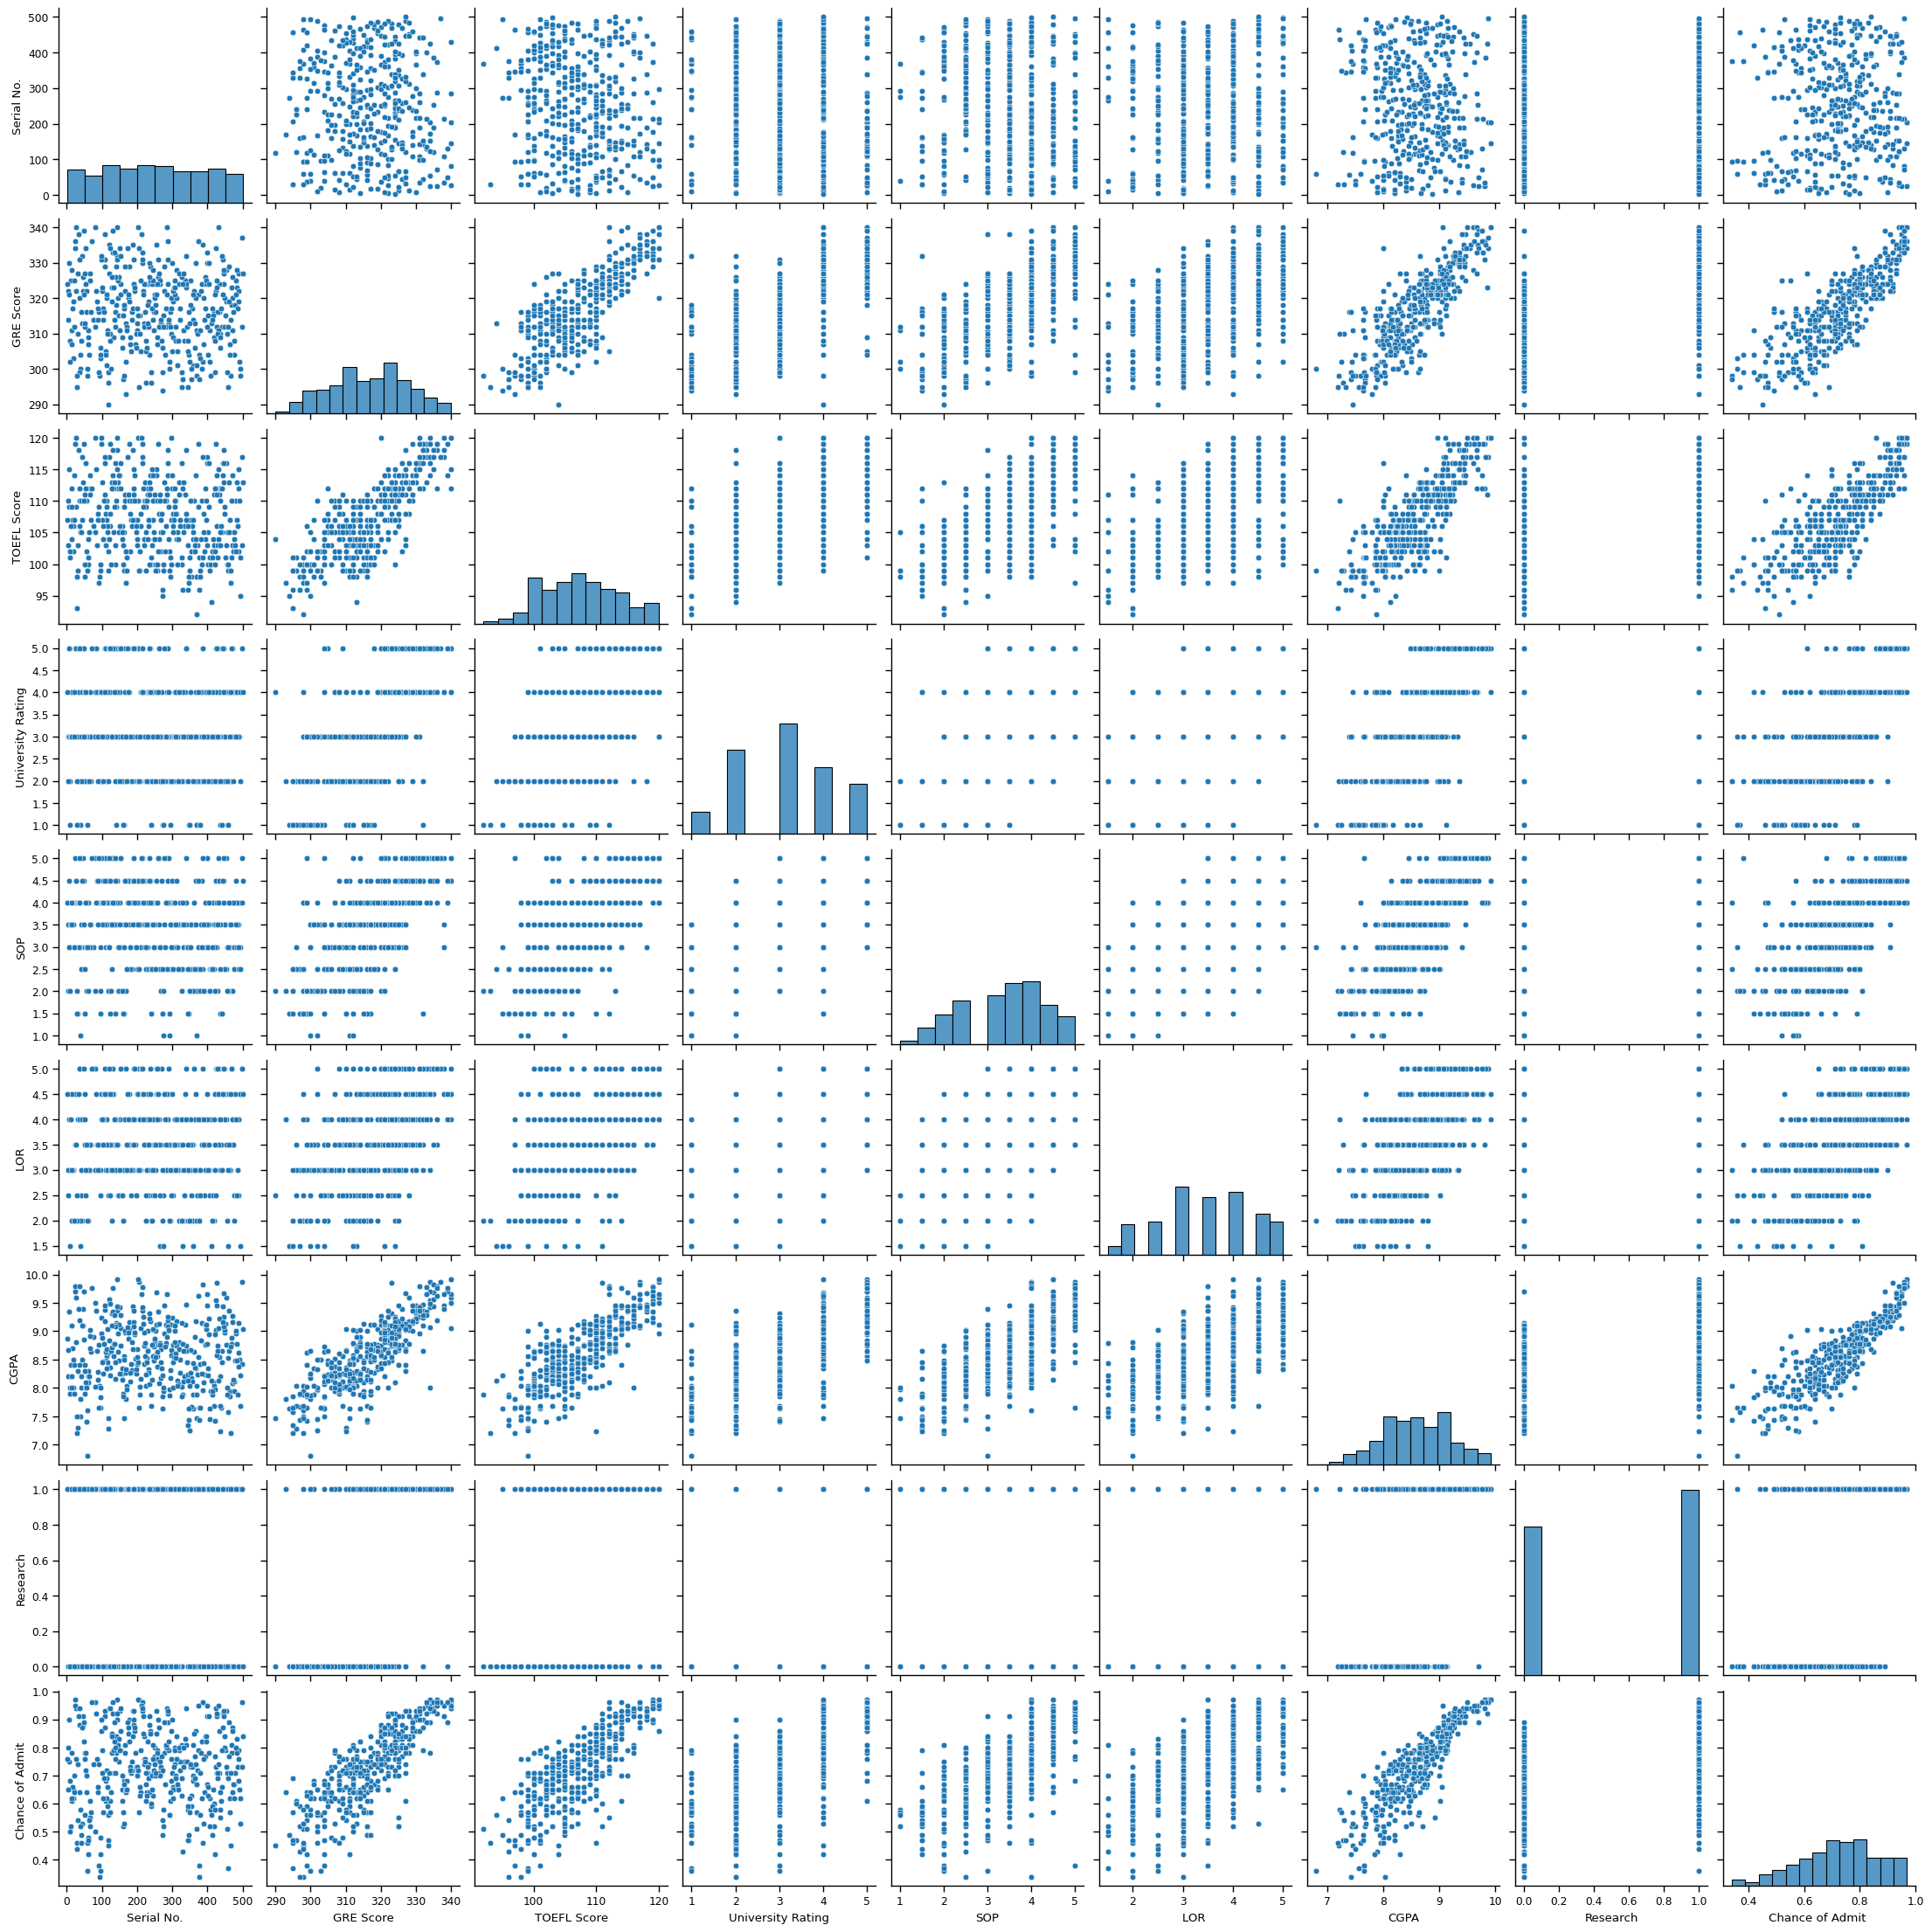

In [251]:
sns.pairplot(train_set) #making seaborn plot to look for any obvious correlations

<Axes: >

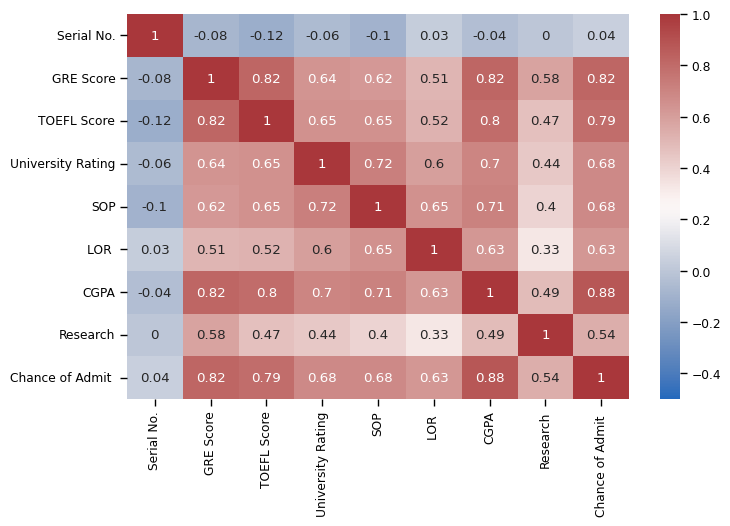

In [252]:
correlation_matrix = train_set.corr().round(2) #making correlation matrix to find highest correlated variables
fig, ax = plt.subplots(figsize=(8.1, 5))
sns.heatmap(data=correlation_matrix, annot=True,vmin=-0.5,vmax=1,cmap='vlag')

# Quick analysis of above correlation matrix and plots:
It appears that CGPA, GRE Score, and TOEFL Score are the most highly correlated variables with the chance of admit. I will examine these variables one by one in order to find the best univariate model / predictor for admission success.

# Scaling, fitting, and getting results from all univariate regression models

In [253]:
from sklearn.preprocessing import StandardScaler #import standardscaler to scale varibles I will be using

target_scaler_Admit = StandardScaler(with_mean=True, with_std=False)#creaing different scaler for every variable
scaled_Admit = target_scaler_Admit.fit_transform(train_set[["Chance of Admit "]])#scaling using standard scaler

target_scaler_CGPA = StandardScaler(with_mean=True, with_std=False)
scaled_CGPA = target_scaler_CGPA.fit_transform(train_set[["CGPA"]])

target_scaler_GRE = StandardScaler(with_mean=True, with_std=False)
scaled_GRE = target_scaler_GRE.fit_transform(train_set[["GRE Score"]])

target_scaler_TOEFL = StandardScaler(with_mean=True, with_std=False)
scaled_TOEFL = target_scaler_TOEFL.fit_transform(train_set[["TOEFL Score"]])

target_scaler_Admit_test = StandardScaler(with_mean=True, with_std=False)
scaled_Admit_test = target_scaler_Admit_test.fit_transform(test_set[["Chance of Admit "]])

target_scaler_CGPA_test = StandardScaler(with_mean=True, with_std=False)
scaled_CGPA_test = target_scaler_CGPA_test.fit_transform(test_set[["CGPA"]])

target_scaler_GRE_test = StandardScaler(with_mean=True, with_std=False)
scaled_GRE_test = target_scaler_GRE_test.fit_transform(test_set[["GRE Score"]])

target_scaler_TOEFL_test = StandardScaler(with_mean=True, with_std=False)
scaled_TOEFL_test = target_scaler_TOEFL_test.fit_transform(test_set[["TOEFL Score"]])

### Model using only CGPA and the model's predictive performance on both the train and test targets.

In [254]:
from sklearn.linear_model import LinearRegression #importing necessary materials for linear regression / analysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score #importing necessary materials for cross validation
from sklearn.pipeline import make_pipeline
model=LinearRegression() #define model
model.fit(scaled_CGPA,scaled_Admit) #fit model
y_train_pred = model.predict(scaled_CGPA) #predict using model
r2 = r2_score(scaled_Admit, y_train_pred) #defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit, y_train_pred) #defining MSE score
RMSE = np.sqrt(MSE) #defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

#Using cross validation method outlined in class
model_xn = scaled_CGPA; model_yn = scaled_Admit #defining each model to be used in the fit
lin_reg = make_pipeline(model) #defining pipeline
lin_reg.fit(model_xn, model_yn) #lin reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:") #finding and printing cross validation scores
pd.Series(linreg_rmses).describe() #printing stats for cross validation

The R-squared of this model is: 0.7710699489989159
The RMSE of this model is: 0.06717098350247601
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.067072
std       0.007359
min       0.050887
25%       0.064604
50%       0.067803
75%       0.071091
max       0.076502
dtype: float64

In [255]:
model=LinearRegression()#define model
model.fit(scaled_CGPA,scaled_Admit)#fit model
y_train_pred = model.predict(scaled_CGPA_test)#predict using model
r2 = r2_score(scaled_Admit_test, y_train_pred)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit_test, y_train_pred)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = scaled_CGPA_test; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.8089090265818666
The RMSE of this model is: 0.06251248200480307
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.060774
std       0.019229
min       0.032331
25%       0.049293
50%       0.054021
75%       0.069889
max       0.094601
dtype: float64

### Model using only GRE and the model's predictive performance on both the train and test targets.

In [256]:
model=LinearRegression()#define model
model.fit(scaled_GRE,scaled_Admit)#fit model
y_train_pred = model.predict(scaled_GRE)#predict using model
r2 = r2_score(scaled_Admit, y_train_pred)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit, y_train_pred)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = scaled_GRE; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.673235578999144
The RMSE of this model is: 0.08025048879403993
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.080250
std       0.007324
min       0.068736
25%       0.075862
50%       0.079157
75%       0.087049
max       0.090407
dtype: float64

In [257]:
model=LinearRegression()#define model
model.fit(scaled_GRE,scaled_Admit)#fit model
y_train_pred = model.predict(scaled_GRE_test)#predict using model
r2 = r2_score(scaled_Admit_test, y_train_pred)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit_test, y_train_pred)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = scaled_GRE_test; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.5861738197157867
The RMSE of this model is: 0.09199318119737006
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.087436
std       0.026544
min       0.048848
25%       0.073482
50%       0.084310
75%       0.108090
max       0.126279
dtype: float64

### Model using only TOEFL Score and the model's predictive performance on both the train and test targets.

In [258]:
model=LinearRegression()#define model
model.fit(scaled_TOEFL,scaled_Admit)#fit model
y_train_pred = model.predict(scaled_TOEFL)#predict using model
r2 = r2_score(scaled_Admit, y_train_pred)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit, y_train_pred)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = scaled_TOEFL; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.6229284547667597
The RMSE of this model is: 0.08620693113928878
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.086351
std       0.005960
min       0.078885
25%       0.082864
50%       0.085366
75%       0.089589
max       0.098692
dtype: float64

In [259]:
model=LinearRegression()#define model
model.fit(scaled_TOEFL,scaled_Admit)#fit model
y_train_pred = model.predict(scaled_TOEFL_test)#predict using model
r2 = r2_score(scaled_Admit_test, y_train_pred)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(scaled_Admit_test, y_train_pred)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = scaled_TOEFL_test; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.6433289366554347
The RMSE of this model is: 0.08540446853295418
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.083764
std       0.023993
min       0.044093
25%       0.073630
50%       0.079089
75%       0.093174
max       0.123864
dtype: float64

# Analysis of which individual feature is the best predictor for admission success
According to the models above, the best single feature for predicting admission success is CGPA. This is because the R squared values for both models are higher than those of other features. The first model, which predicts against the training set, has an R2 of .77. The second model, which predicts against the test set, has an R2 of .81. This means that the 77% and 81% of the variance is explained by the respective models. Also, the RMSE scores for these models are lower than the other models. The RMSE scores for each are .067 and .063. This means that the Root Mean Squared Error is lower than the other models using other features. The cross validation results would also support these initial RMSE values. After obtaining these results, I can confidently say that CGPA is the most effective individual feature for predicting admission success.


# Finding decision boundary value for CGPA where the chance of admission goes above 90%

In [260]:
df['New_Admit_binary'] = (df['Chance of Admit '] > 0.5).astype(int)#creating new column with binary values
X_train = df[['CGPA']].values#defining X train
y_train = df[['New_Admit_binary']].values.ravel()#defining y train
X_train_scaled = target_scaler_CGPA.fit_transform(X_train) #scaling X
model = LogisticRegression() #defining model
model.fit(X_train_scaled, y_train) #fitting model
CGPA_values = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 1000).reshape(-1, 1)#spacing CGPA values
y_probability = model.predict_proba(CGPA_values)[:, 1]#predicting probability of admission using CGPA
ninedy_value = CGPA_values[y_probability >= 0.9].min()#defining 90 percent using probability
ninedy_value_reshaped = ninedy_value.reshape(1, -1)#reshaping 90th percent
CGPA_inverse = target_scaler_CGPA.inverse_transform(ninedy_value_reshaped)[0, 0]#inverse transform to original scale
CGPA_inverse#print final value

8.08984984984985

#### This value of 8.0898 means that this is the minimum CGPA score in the data set where the change of admission is greater than or equal to 90%.

# Finding Best Multivariate regression model

### Model using CGPA and GRE Score and the model's predictive performance on both the train and test targets.

In [261]:
X = df[['CGPA', 'GRE Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_2 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_2 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_2, y_train)#fit model
predictions = model.predict(X_train_scaled_2)#predict using model

r2 = r2_score(y_train, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_train, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_train_scaled_2; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.8002855929702087
The RMSE of this model is: 0.0627386258594766
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.062510
std       0.008105
min       0.050076
25%       0.055037
50%       0.065865
75%       0.068678
max       0.073190
dtype: float64

In [262]:
X = df[['CGPA', 'GRE Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_2 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_2 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_2, y_train)#fit model
predictions = model.predict(X_test_scaled_2)#predict using model

r2 = r2_score(y_test, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_test, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_test_scaled_2; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.7847497568082384
The RMSE of this model is: 0.06634657092323254
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.060506
std       0.019357
min       0.032421
25%       0.049559
50%       0.052797
75%       0.068803
max       0.096085
dtype: float64

### Model using CGPA and TOEFL Score and the model's predictive performance on both the train and test targets.

In [263]:
X = df[['CGPA', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_3 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_3 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_3, y_train)#fit model
predictions = model.predict(X_train_scaled_3)#predict using model

r2 = r2_score(y_train, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_train, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_train_scaled_3; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.792800009352653
The RMSE of this model is: 0.06390357728774071
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.063933
std       0.006965
min       0.050211
25%       0.059031
50%       0.065557
75%       0.068874
max       0.071897
dtype: float64

In [264]:
X = df[['CGPA', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_3 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_3 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_3, y_train)#fit model
predictions = model.predict(X_test_scaled_3)#predict using model

r2 = r2_score(y_test, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_test, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_test_scaled_3; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.7998219636751848
The RMSE of this model is: 0.06398156643004665
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.060562
std       0.020334
min       0.029981
25%       0.049295
50%       0.052578
75%       0.069826
max       0.096011
dtype: float64

### Model using TOEFL Score and GRE Score and the model's predictive performance on both the train and test targets.

In [265]:
X = df[['GRE Score', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_4 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_4 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_4, y_train)#fit model
predictions = model.predict(X_train_scaled_4)#predict using model

r2 = r2_score(y_train, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_train, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_train_scaled_4; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.7154720034905332
The RMSE of this model is: 0.07488465056562468
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.075056
std       0.006527
min       0.062541
25%       0.072690
50%       0.075119
75%       0.080664
max       0.082397
dtype: float64

In [266]:
X = df[['GRE Score', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_4 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_4 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_4, y_train)#fit model
predictions = model.predict(X_test_scaled_4)#predict using model

r2 = r2_score(y_test, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_test, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_test_scaled_4; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.6451389861448146
The RMSE of this model is: 0.08518748577894844
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.080364
std       0.024700
min       0.042627
25%       0.065922
50%       0.078031
75%       0.091464
max       0.117429
dtype: float64

### Model using CGPA, GRE Score and TOEFL Score and the model's predictive performance on both the train and test targets.

In [267]:
X = df[['CGPA','GRE Score', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_5 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_5 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_5, y_train)#fit model
predictions = model.predict(X_train_scaled_5)#predict using model

r2 = r2_score(y_train, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_train, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_train_scaled_5; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.8060699039019235
The RMSE of this model is: 0.0618234036217142
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.061783
std       0.007700
min       0.049550
25%       0.054507
50%       0.065985
75%       0.066857
max       0.070831
dtype: float64

In [268]:
X = df[['CGPA','GRE Score', 'TOEFL Score']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_5 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_5 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_5, y_train)#fit model
predictions = model.predict(X_test_scaled_5)#predict using model

r2 = r2_score(y_test, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_test, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_test_scaled_5; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.7870742372532833
The RMSE of this model is: 0.06598736127600767
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.060688
std       0.020107
min       0.031000
25%       0.049357
50%       0.053092
75%       0.069398
max       0.096386
dtype: float64

### Model using all 7 features and the model's predictive performance on both the train and test targets.

In [269]:
X = df[['CGPA','GRE Score', 'TOEFL Score', 'SOP','University Rating', 'LOR ', 'Research']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_6 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_6 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_6, y_train)#fit model
predictions = model.predict(X_train_scaled_6)#predict using model

r2 = r2_score(y_train, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_train, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_train_scaled_6; model_yn = scaled_Admit#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.8210671369321554
The RMSE of this model is: 0.05938480848210052
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.059891
std       0.007423
min       0.049819
25%       0.052654
50%       0.063522
75%       0.064754
max       0.069340
dtype: float64

In [270]:
X = df[['CGPA','GRE Score', 'TOEFL Score', 'SOP','University Rating', 'LOR ', 'Research']]
y = df['Chance of Admit ']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split
target_scaler_GPA_and_GRE = StandardScaler(with_mean=True, with_std=False)
X_train_scaled_6 = target_scaler_GPA_and_GRE.fit_transform(X_train)#scaling both X train and X test
X_test_scaled_6 = target_scaler_GPA_and_GRE.fit_transform(X_test)
model = LinearRegression()#define model
model.fit(X_train_scaled_6, y_train)#fit model
predictions = model.predict(X_test_scaled_6)#predict using model

r2 = r2_score(y_test, predictions)#defining R2 score
print("The R-squared of this model is: {}".format(r2))#printing R2
MSE = mean_squared_error(y_test, predictions)#defining MSE score
RMSE = np.sqrt(MSE)#defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_test_scaled_6; model_yn = scaled_Admit_test#defining each model to be used in the fit
lin_reg = make_pipeline(model)#defining pipeline
lin_reg.fit(model_xn, model_yn)#lin_reg fit
linreg_rmses = -cross_val_score(lin_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:")#finding / printing cross validation scores
pd.Series(linreg_rmses).describe()#printing stats for cross validation

The R-squared of this model is: 0.8130491925606567
The RMSE of this model is: 0.061831577791081574
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.058257
std       0.018853
min       0.036784
25%       0.043497
50%       0.054506
75%       0.066410
max       0.091370
dtype: float64

# Analysis of which combination of features in multivariate regression is the best predictor for admission success
I completed several multivariate regression above in order to test which one was most effective. I conclude that the most effective is a multivariate regression that used all 7 features in order to predict admission success. This is because the R2 is .82 and .81 for both models, which is higher than all of the other multivariate models. Additonally the RMSE scores of .059 and .062 are lower than the other models as well. I experimented with these models by adding an additional feature each time I ran the model. I observed that the R2 would gradually get higher after each feature added, which leads me to believe that the best multivariate model is one with all 7 features included, like the ones directly above this text.

# Final Discussion
In terms of inspecting the data set, I observed that the data set did not contain any missing values or bad records. I completed this inspection by singling out each feature within the data frame and performing a .unique() function on all of them. I included an example of this above with the 'Chance of Admit ' variable. After this, I quickly looked to see if there were any question marks or unusual values.

I did choose to scale the data before the analysis as I noticed the scales of measurement for many of the features were different than others. For example, the CGPA appears as an integer out of 10, but GRE scores appear out of 340. These two scales are drastically different, so I felt as if it was necessary and useful to rescale all features. This would also ensure that my linear regression models function more effectively and do not give any one feature more weight than another.

I do not believe that my model would have benefitted more from using stratefied sampling on any of the features. I came to this conclusion by creating a histogram of each feature and looking at any unbalanced values. However, with this data set, most of the features appeared to be relatively normal when graphed. As a result, I felt comfortable not using stratefied sampling on any features. I did not include these histrograms in my code as they are not essential towards this particular problem.

In order to chose my models and the features that were included, I created a seaborn plot and a correlation matrix that allowed me to analyze any obvious relationships between variables. I decided on using a simple linear regression model because of a few reasons. First, I noticed that there are only 7 independent features, which is not an abnormally high ammount. All of these features play a significant role in predicting whether a person will be admitted or not. There are some that are more correlated than others, but I didn't think their coefficients needed to be shrunk or reduced outright. Additionally, there were only 500 samples within the data, which is not abnormally high either. In conclusion, I felt as if this data was suitable for regular Linear Regression. The coefficients of my models are the perameters. I considered using Lasso or Ridge regression in order to experiment with the learning rate hyperperameter, but I felt as if regular linear regression was still most suitable for this particular problem.